In [1]:
%matplotlib inline
import velocyto as vcy
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
from copy import deepcopy
import pickle
from velocity_helper import VelocityHelper

/home/smudge/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/smudge/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/home/smudge/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 1: 
  warnings.warn(x, RRuntimeWarning)
/home/smudge/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In value[[3L]](cond) :
  warnings.warn(x, RRuntimeWarning)
/home/smudge/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/home/smudge/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRu

In [2]:
vh = VelocityHelper()
cell_type_file = "/home/smudge/Documents/kessenbrock_lab/RNA_velocity/ind4_celltypes.tsv"
marker_gene_file = "/home/smudge/Documents/kessenbrock_lab/RNA_velocity/ind4/ind4_marker_genes_trim.txt"

In [5]:
ind4 = vcy.VelocytoLoom("ind4/velocyto_out/possorted_genome_bam_5AUZJ.loom")

#fix barcode names:
ind4.ca['CellID'] = np.array([b.split(":")[1] for b in ind4.ca["CellID"]])

In [6]:
ind4 = vh.processing_pipeline(
    vlm=ind4,
    cell_type_file=cell_type_file,
    name="ind4",
    outputdir="/home/smudge/Documents/kessenbrock_lab/RNA_velocity/"
)

Filtering cells with low unspliced detection:


shape 1: (58676, 7094) (58676, 7094)


Incorporating cell types from /home/smudge/Documents/kessenbrock_lab/RNA_velocity/ind4_celltypes.tsv


shape 2: (58676, 4022) (58676, 4022)


Filtering genes by detection level


shape 3: (10318, 4022) (10318, 4022)


Normalizing spliced and unspliced matrices by molecule counts
Running PCA
Running knn imputation
Fitting gammas
Calculating rna velocity
Computing TSNE embedding
Estimating transition probabilities


<Figure size 432x288 with 0 Axes>

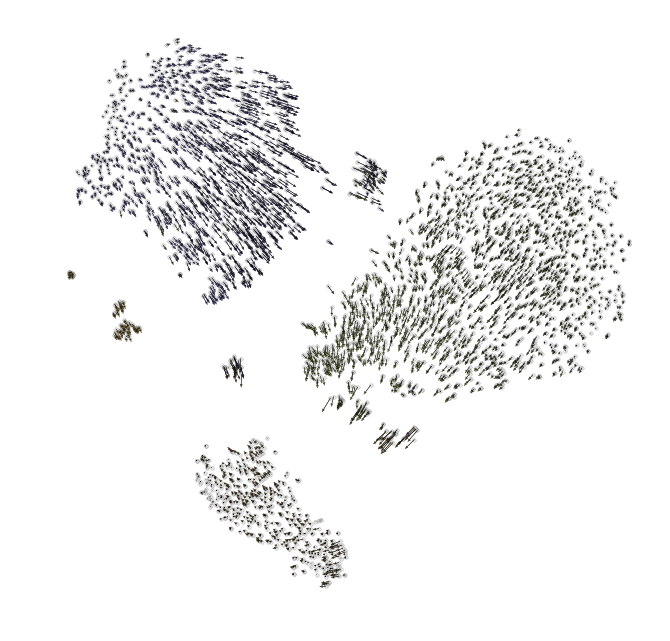

In [13]:
f = plt.figure(figsize=(10,10),dpi=80)
vh.plot_raw_velocity_tsne(ind4)
plt.axis("off");